Combining the features of pandas and structured query language to explore the given datasets

In [1]:
#import the essential packages of pandas and sqlite3
import pandas as pd
import sqlite3 as sql
import matplotlib as plt

In [2]:
#Build a database named project.db
conn=sql.connect('project.db')

In [3]:
#Import the datasets into pandas.dataframe
vax=pd.read_csv('country_vaccinations.csv',index_col="country")
covid_weekly_trend=pd.read_csv('covid_world_weekly_trend.csv')
g7=pd.read_csv('G7.csv')
demo_index=pd.read_csv('demo_index_cor.csv')

In [4]:
#Building tables from the existing data frames
g7.to_sql('g7',conn, if_exists='replace', index=False)
vax.to_sql('vax',conn, if_exists='replace', index=False)
covid_weekly_trend.to_sql('covid_weekly_trend',conn, if_exists='replace', index=False)
demo_index.to_sql('demo_index',conn, if_exists='replace', index=False)
#Now,we have 4 kinds of tables, they are g7,vax,weekly_trend,demo_index

Topic 1.Covid weekly trend data insight retrieved from countries and continents

0         Russia
1        Germany
2         Brazil
3    South Korea
4         Turkey
Name: Country and other, dtype: object

array([<AxesSubplot:title={'center':' Cases in the last 7 days'}, xlabel='Country and other'>,
       <AxesSubplot:title={'center':'Deaths in the last 7 days'}, xlabel='Country and other'>],
      dtype=object)

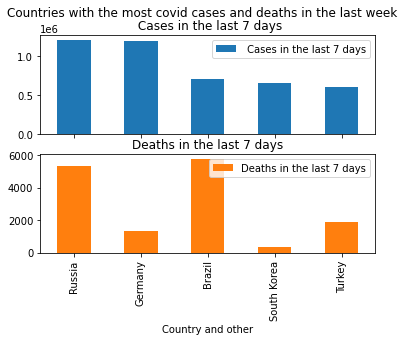

In [5]:
##Question 1.Showing the top 5 countries having the most death caused by covid in the last 7 days##
query1="""SELECT 
        country_other AS 'Country and other',
        case_last7d AS ' Cases in the last 7 days',
        death_last7d AS 'Deaths in the last 7 days'
    FROM
        covid_weekly_trend
    ORDER BY case_last7d DESC
    LIMIT 5;"""
q1=pd.read_sql(query1,conn)
display(q1.iloc[:,0])
q1.plot(x='Country and other',kind='bar',subplots=True,title='Countries with the most covid cases and deaths in the last week')


0    Central African Republic
1                 El Salvador
2                     Lesotho
3                  Montserrat
4                     Liberia
Name: Country and other, dtype: object

array([<AxesSubplot:title={'center':' Cases in the last 7 days'}, xlabel='Country and other'>,
       <AxesSubplot:title={'center':'Deaths in the last 7 days'}, xlabel='Country and other'>],
      dtype=object)

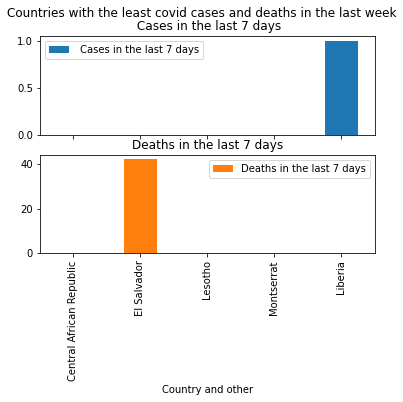

In [6]:
##Question 2.Showing the bottom 5 countries having the lesat death caused by covid  in the last 7 days##
query2="""SELECT 
        country_other AS 'Country and other',
        case_last7d AS ' Cases in the last 7 days',
        death_last7d AS 'Deaths in the last 7 days'
    FROM
        covid_weekly_trend
    ORDER BY case_last7d ASC
    LIMIT 5;"""
q2=pd.read_sql(query2,conn)
display(q2.iloc[:,0])
q2.plot(x='Country and other',kind='bar',subplots=True,title='Countries with the least covid cases and deaths in the last week')


0           Europe
1             Asia
2    South America
3    North America
4          Oceania
5           Africa
Name: continent, dtype: object

<AxesSubplot:title={'center':'Cases in the last week group by continent'}, xlabel='continent'>

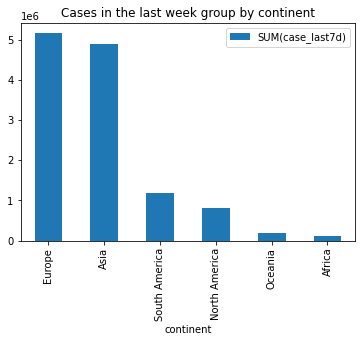

In [7]:
#Question 3 Showing the ranking of infectious cases group by continent
query3="""SELECT 
    continent, SUM(case_last7d)
FROM
    covid_weekly_trend
GROUP BY continent
ORDER BY SUM(case_last7d) DESC;"""
q3=pd.read_sql(query3,conn)
display(q3.iloc[:,0])
q3.plot(x='continent',kind='bar',title='Cases in the last week group by continent')

Topic 2. Explore the relationship betwwen vaccinations and covid-19 cases and deaths

<AxesSubplot:title={'center':"Russia's vaccinations progress through recent years"}, xlabel='date'>

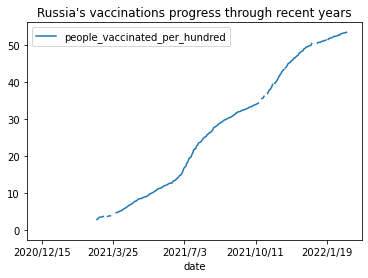

In [8]:
#Question 4.Russia, the country with the most covid-19 cases, how about Russia's vaccinations progress since 2021?


#Using pandas dataframe attribute to tackle this question
vax.loc["Russia",["people_vaccinated_per_hundred","date"]].plot(x="date",title="Russia's vaccinations progress through recent years")

0         Russia
1        Germany
2         Brazil
3    South Korea
4         Turkey
Name: Country and other, dtype: object

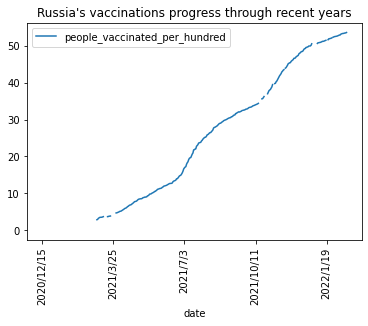

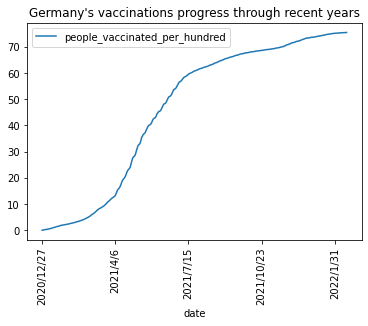

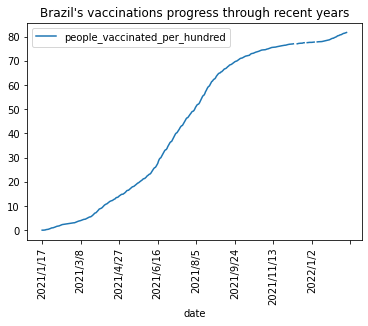

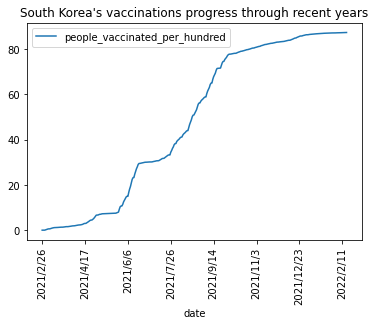

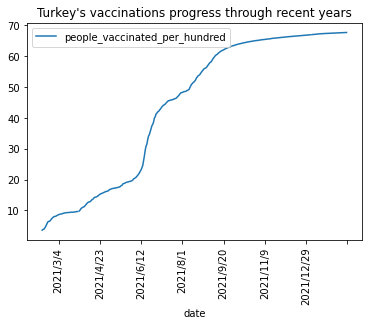

In [9]:
#Question 5 How about other 4 countries' vaccinations progress in the last week
type(q1.iloc[:,0])
display(q1.iloc[:,0])
for i in q1.iloc[:,0].tolist():
    vax.loc[i,["people_vaccinated_per_hundred","date"]].plot(x="date",title=i+"'s vaccinations progress through recent years",rot=90)

,people_vaccinated_per_hundred,date
country,,
Japan,0.00,2021/2/17
Japan,0.00,2021/2/18
Japan,0.00,2021/2/19
Japan,NaN,2021/2/20
Japan,NaN,2021/2/21
...,...,...
France,79.95,2022/2/11
France,79.96,2022/2/12
France,79.96,2022/2/13


country
Canada     AxesSubplot(0.125,0.125;0.775x0.755)
France     AxesSubplot(0.125,0.125;0.775x0.755)
Germany    AxesSubplot(0.125,0.125;0.775x0.755)
Italy      AxesSubplot(0.125,0.125;0.775x0.755)
Japan      AxesSubplot(0.125,0.125;0.775x0.755)
UK         AxesSubplot(0.125,0.125;0.775x0.755)
USA        AxesSubplot(0.125,0.125;0.775x0.755)
Name: people_vaccinated_per_hundred, dtype: object

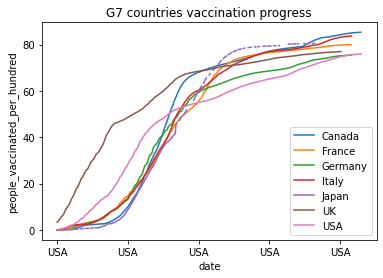

In [10]:
#Question 6 How about G7 country group's vaccinations progress recent years
g7.iloc[:,0].to_list()
g7_vax=[]
for i in g7.iloc[:,0].to_list():
    g7_vax.append(vax.loc[i,["people_vaccinated_per_hundred","date"]])
g7_vax1=pd.concat(g7_vax)
display(g7_vax1)
g7_vax1.groupby('country')['people_vaccinated_per_hundred'].plot(x='date',xlabel='date',legend=True,ylabel='people_vaccinated_per_hundred',title='G7 countries vaccination progress')

Topic 3.Exploring if democracy index correlated to infectious cases and vaccination progress.

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

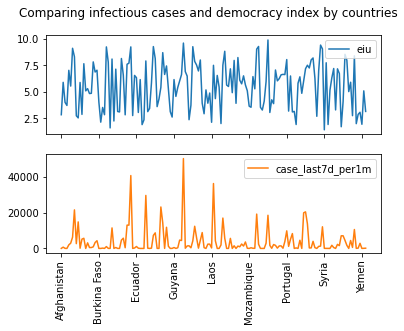

In [11]:
#Question 7 Comparing their infectious cases and democracy index
demo=demo_index.loc[:,["eiu","country"]]
case_last7d_perMillion=covid_weekly_trend.loc[:,["country_other","case_last7d_per1m"]]
join_2=demo.set_index('country').join(case_last7d_perMillion.set_index('country_other'))
join_2.plot(subplots=True,title="Comparing infectious cases and democracy index by countries",rot=90)
#We can see that the the number of cases per one million fluctuates as democracy index changes roughly 

array([<AxesSubplot:xlabel='country'>, <AxesSubplot:xlabel='country'>],
      dtype=object)

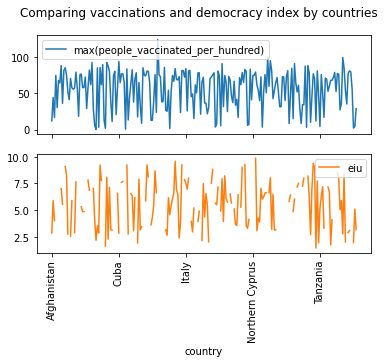

In [12]:
#Question 8 Exploring the relationship between vaccination progress and democracy index
vax_1=pd.read_csv('country_vaccinations.csv')
vax_1.to_sql('vax_1',conn, if_exists='replace', index=False)
vax_1
latest_vax="""select country,max(people_vaccinated_per_hundred) from vax_1 group by country """
vax_demo=pd.read_sql(latest_vax,conn).set_index('country').join(demo.set_index('country'))
vax_demo.plot(subplots=True,title="Comparing vaccinations and democracy index by countries",rot=90)
#We can see that the the vaccinated people per hundred fluctuates as democracy index changes roughly 

Topic 4.G7 countries

In [19]:
#Question 9. G7 group countries deaths in the last 7 days per one million compare to the world average level
covid_weekly_trend
compare="""select country_other,death_last7_per1m,iif(death_last7_per1m>(select avg(death_last7_per1m) from covid_weekly_trend),"yes","no") as "above average death level" from g7 left join covid_weekly_trend on country_other=country"""
pd.read_sql(compare,conn)

,country_other,death_last7_per1m,above average death level
0,Japan,12.0,no
1,USA,35.0,yes
2,Canada,12.0,no
3,Germany,16.0,no
4,Italy,31.0,yes
5,UK,15.0,no
6,France,26.0,yes
